Import all libraries required.
1. Cv2 - OpenCV Library for performing image processing tasks
2. numpy = For matrix manipulation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow # for image display as colab
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

**Task 1** : How to read an image using cv2 and how to display image.

***Note***: You can use cv2.imshow() function in local jupiter/python environment in colab it won't run as colab has environment restriction, hence cv2_imshow.

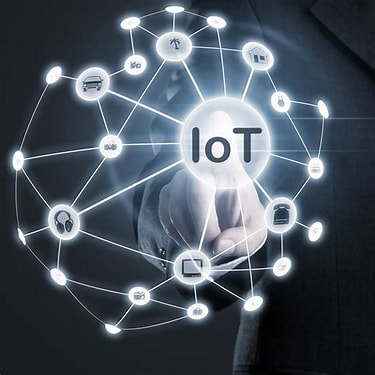

In [2]:
img = cv2.imread('/content/iot.jpg')
cv2_imshow(img)

**Task 2** : Get to know image properties.

Visit the link : https://scikit-image.org/docs/stable/user_guide/data_types.html to get to know various image storage formats.

In [3]:
# Check the image matrix data type (could know the bit depth of the image)
print(img.dtype)
# Check the height of img
print(img.shape[0])
# Check the width of img
print(img.shape[1])
# Check the number of channels of the img
print(img.shape[2])
# Check the value stored at pixel position (520, 120)
print(img[20,20])

uint8
375
375
3
[37 33 28]


**Task 3** : How to resize the image.
Below code scales down resolution of original image by half i.e. reduce size by 50%.

***Classwork*** : Resize image to dimensions below
1. 500 X 350 px
2. 350 X 300 px
3. 75% of width X 25% of height
4. Resize to 25% of both width and height
5. Resize by 110% of both width and height
6. Resize to 200% of both width and height

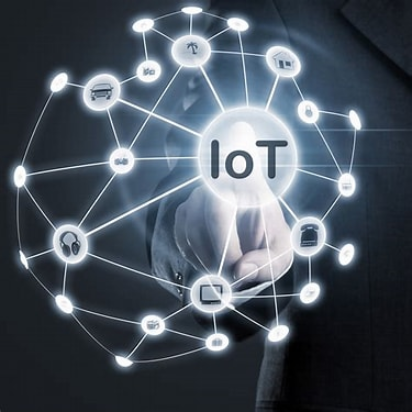

In [4]:
resized_image = cv2.resize(img, (img.shape[0]*11//10,img.shape[1]*11 //10))
cv2_imshow(resized_image)

**Task 4** : Since we know that a grayscale image is nothing but a matrix having each cell (pixel) value between 0 to 255.
Let's create a random array and print it as an image.

In [5]:
# Create a 200x200 array with random values between 0 and 255
random_array = np.random.randint(0, 256, size=(200, 200), dtype=np.uint8)
print(random_array)

[[239   2  40 ... 129  45 119]
 [203 125   5 ... 113 243  70]
 [ 86  69  26 ...  28  63 209]
 ...
 [ 63  84  49 ...  93  98 202]
 [127 226 196 ... 181   7  68]
 [ 47  13  97 ...  73 185 233]]


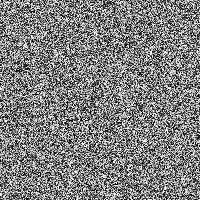

In [6]:
cv2_imshow(random_array)

**Classwork** : Create a random array of size 200 X 200 such that
1. It has 3 intensities 0, 125, 255 where 1/3rd of image is of 0 intensity, 1/3rd of 125 and 1/3rd of 255.
2. Create a horizontal gradient image with pixel intensity range as 0,1,3,7,15,31,63,127,255
3. Create a vertical gradient image with pixel intensity range as 0,1,3,7,15,31,63,127,255
4. Create a diagonal grdient image with direction starting from (0,0) pixel to (199,199).
5. Create a diagonal grdient image with direction starting from (199,0) pixel to (0,199).

**Task 5** : RGB to grayscale image conversion

***Classwork*** :
1. Convert an RGB image to grayscale and display negative of that image.
2. Convert an RGB image to grayscale and multiply each pixel value of this image by 2, then display it.
3. Convert an RGB image to grayscale and divide each pixel value of this image by 2, then display it.
4. Convert an RGB image to grayscale and use log formula on each pixel value, then display it. Hint : S(r) = 2*log(1+r).
5. Convert an RGB image to grayscale and use power-law formula on each pixel value, then display it. Hint : S(r) = 2*pow(r,2) and S(r) = 2*pow(r,0.25).

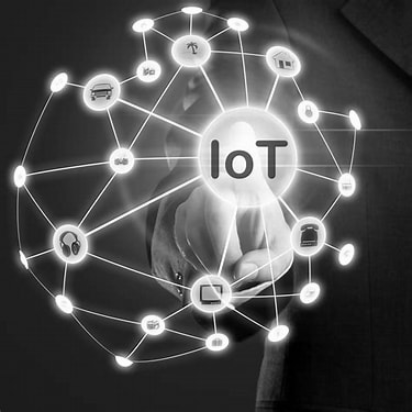

In [7]:
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

**Task 6 :** Generate Histogram of the grayscale image generated above.

For this we use function cv2.calHist()
*Parameters*
1. images: The source image(s) for which the histogram is to be calculated. It should be provided in square brackets, e.g., [img].
2. channels: The index of the channel for which the histogram is calculated. For a grayscale image, this is [0]. For a color image, you can specify [0] for blue, [1] for green, and [2] for red.
3. mask: An optional mask image. If provided, the histogram is calculated only for the masked region. Use None if no mask is needed.
4. histSize: The number of bins in the histogram. For example, [256] for a grayscale image with 256 intensity levels.
5. ranges: The range of pixel values to be measured. For example, [0, 256] for pixel values ranging from 0 to 255.

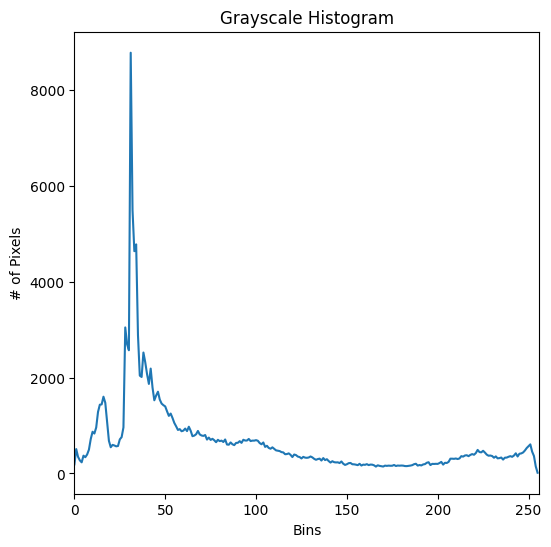

In [34]:
def plot_histogram(img,str):
  hist = cv2.calcHist([img],[0],None,[256],[0,256])
  # initializes a new figure object where you can add plots, titles, labels, and other elements.
  plt.figure(figsize=(6,6),dpi=100)
  # title of figure
  plt.title(str)
  # label x-axis
  plt.xlabel("Bins")
  # label y-axis
  plt.ylabel("# of Pixels")
  # plot histogram on figure
  plt.plot(hist)
  # set range of x-axis
  plt.xlim([0, 256])
  # display plot
  plt.show()
plot_histogram(img=gray_image,str="Grayscale Histogram")

***Classwork***:

1. Download and Plot histograms any 5 low contrast and high contrast grayscale image.
2. Perform contrast stretching on all of these images using code below.
3. Perform thresholding on these images
4. Perform graylevel slicing
5. Perform bit plane slicing


[[ 3  2  2 ... 21 21 21]
 [ 2  1  1 ... 21 21 21]
 [ 0  0  0 ... 21 21 21]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[ 3  2  2 ... 21 21 21]
 [ 2  1  1 ... 21 21 21]
 [ 0  0  0 ... 21 21 21]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


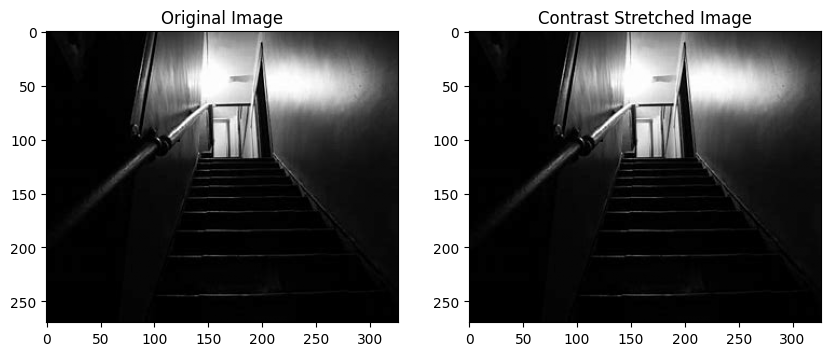

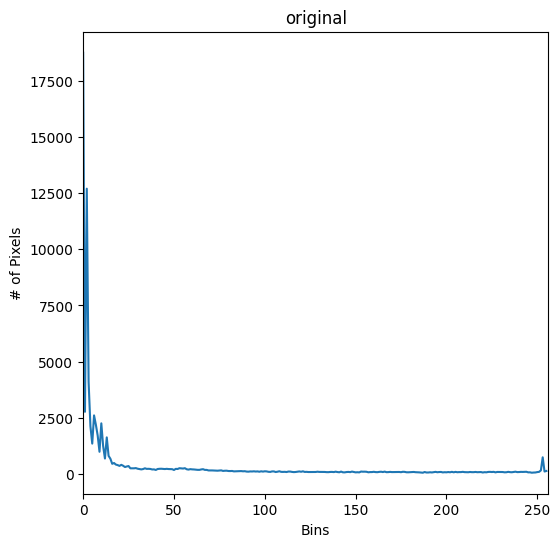

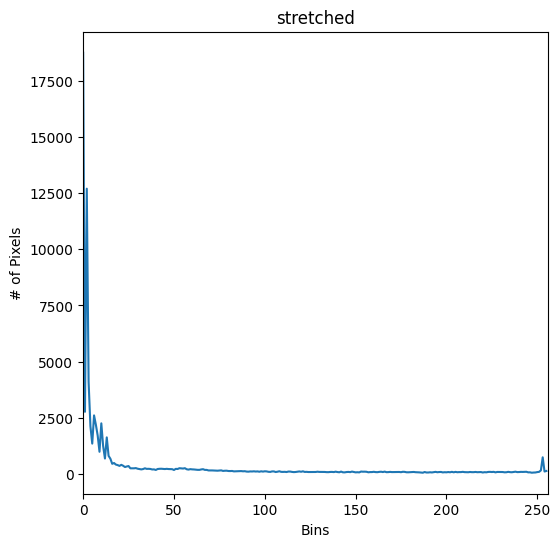

In [41]:
def contrast_stretching(img):
    # Find the minimum and maximum pixel values
    r_min, r_max = np.min(img), np.max(img)
    print(img)
    # Apply contrast stretching
    stretched_img = ((img - r_min) / (r_max - r_min) * 255).astype(np.uint8)
    print(stretched_img)
    # Display the original and stretched images for comparison
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Contrast Stretched Image')
    plt.imshow(stretched_img, cmap='gray')

    plt.show()

    plot_histogram(img,"original")
    plot_histogram(stretched_img,"stretched")

# Calling function contrast_stretching on above generated gray_image
img0 = cv2.imread('/content/img4.jpg', cv2.IMREAD_GRAYSCALE)
contrast_stretching(img0)